In [1]:
import pandas as pd
import math
import csv

In [35]:
cols = ['psinstitution', 'personstatusgrad ', 'personstatustime', 'psage']
df = pd.read_csv('../../Data/SMTO_2019/SMTO_2019_Respondents.csv', low_memory=False)[cols]
df['School_Type'] = df['psinstitution'].apply(lambda x: 'College' if 'College' in x else 'University')
df.tail()

,psinstitution,personstatusgrad,personstatustime,psage,School_Type
19130,York University,UG,FT,45.0,University
19131,York University,Grad,FT,32.0,University
19132,York University,UG,FT,18.0,University
19133,York University,UG,FT,20.0,University
19134,York University,NaN,NaN,23.0,University


In [38]:
def row_to_level(x):
    return x['personstatusgrad '] if isinstance(x['personstatusgrad '], str) else ("College" if x.School_Type == 'College' else None)
df['Level'] = df.apply(row_to_level, axis=1)

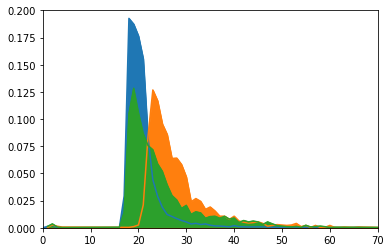

In [14]:
df[df['Level'] == 'UG']['Age'].value_counts(normalize = True).sort_index().plot.area(xlim = [0,70], ylim = [0,0.2])
df[df['Level'] == 'Grad']['Age'].value_counts(normalize = True).sort_index().plot.area(xlim = [0,70], ylim = [0,0.2])
df[df['Level'] == 'College']['Age'].value_counts(normalize = True).sort_index().plot.area(xlim = [0,70], ylim = [0,0.2])

In [15]:
xs = df['Age'].unique()
xs.sort()
UGs, Grads, Colleges = [], [], []
for age in xs:
    temp = df[df['Age'] == age]['Level'].value_counts(normalize=True)
    UGs.append(temp['UG'] if 'UG' in temp else 0)
    Grads.append(temp['Grad'] if 'Grad' in temp else 0)
    Colleges.append(temp['College'] if 'College' in temp else 0)

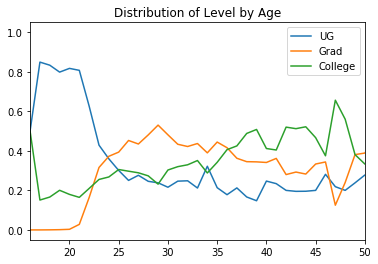

In [16]:
import matplotlib.pyplot as plt
plt.plot(xs, UGs)
plt.plot(xs, Grads)
plt.plot(xs, Colleges)
plt.xlim(16, 50)
plt.legend(labels=['UG', 'Grad', 'College'])
plt.title('Distribution of Level by Age')
plt.show()

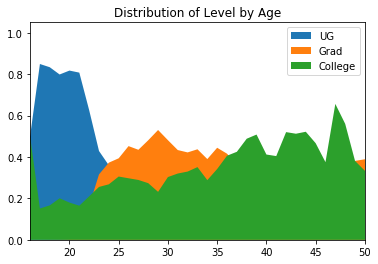

In [17]:
import matplotlib.pyplot as plt
plt.stackplot(xs, UGs)
plt.stackplot(xs, Grads)
plt.stackplot(xs, Colleges)
plt.xlim(16, 50)
plt.legend(labels=['UG', 'Grad', 'College'])
plt.title('Distribution of Level by Age')
plt.show()

In [18]:
xs = df['Age'].unique()
xs.sort()
UGs, Grads, Colleges = [], [], []
for age in xs:
    temp = df[df['Age'] == age]['Level'].value_counts(normalize=True)
    UG, Grad, College = temp['UG'] if 'UG' in temp else 0, temp['Grad'] if 'Grad' in temp else 0, temp['College'] if 'College' in temp else 0
    UGs.append(UG)
    Grads.append(UG + Grad)
    Colleges.append(UG + Grad + College)

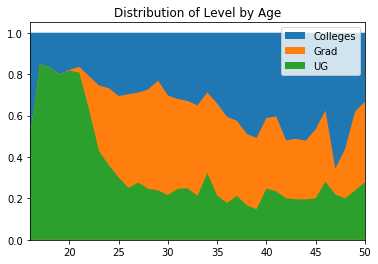

In [19]:
import matplotlib.pyplot as plt
plt.stackplot(xs, Colleges)
plt.stackplot(xs, Grads)
plt.stackplot(xs, UGs)
plt.xlim(16, 50)
plt.legend(labels=['Colleges', 'Grad', 'UG'])
plt.title('Distribution of Level by Age')
plt.show()

In [20]:
xs = df['Age'].unique()
xs.sort()
UGs, Grads, Colleges = [], [], []
for age in xs:
    temp = df[df['Age'] == age]['Level'].value_counts()
    UG, Grad, College = temp['UG'] if 'UG' in temp else 0, temp['Grad'] if 'Grad' in temp else 0, temp['College'] if 'College' in temp else 0
    UGs.append(UG)
    Grads.append(UG + Grad)
    Colleges.append(UG + Grad + College)

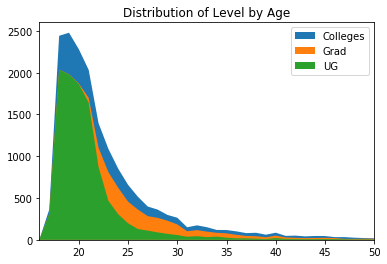

In [21]:
import matplotlib.pyplot as plt
plt.stackplot(xs, Colleges)
plt.stackplot(xs, Grads)
plt.stackplot(xs, UGs)
plt.xlim(16, 50)
plt.legend(labels=['Colleges', 'Grad', 'UG'])
plt.title('Distribution of Level by Age')
plt.show()